# World Happiness Report Prediction

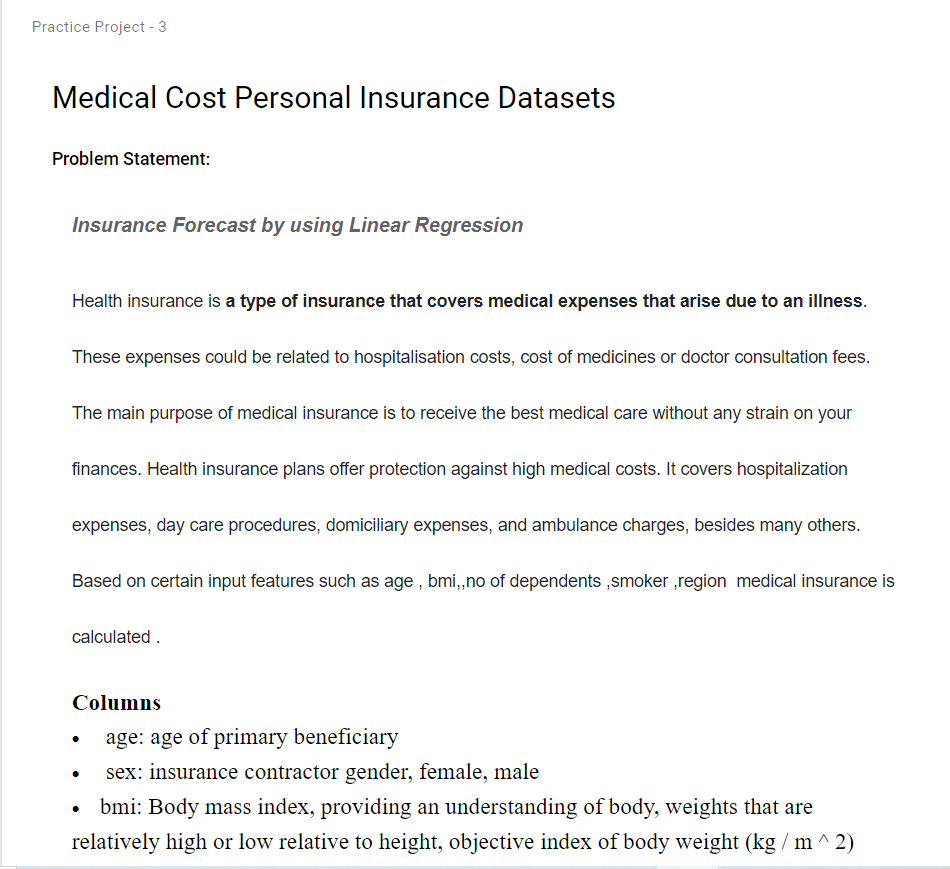

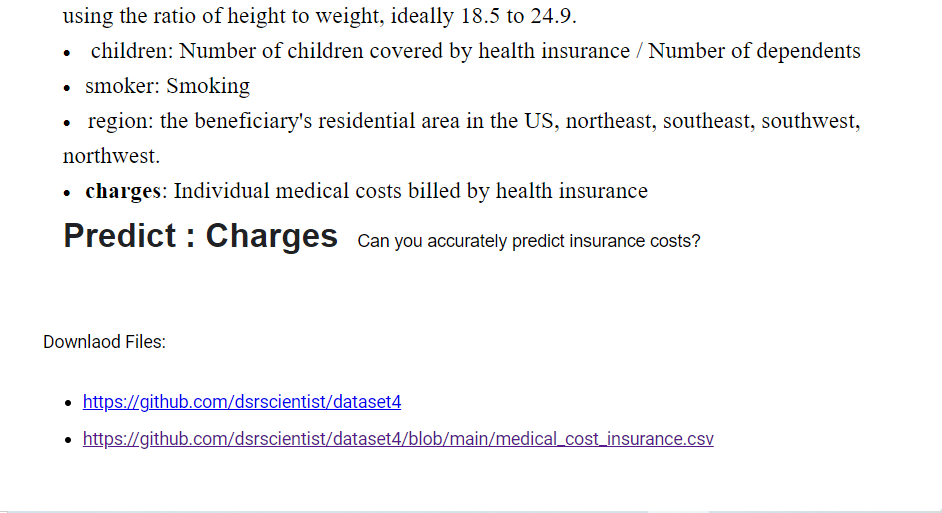

# Importing the Dataset:

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("medical_cost_insurance.csv") #reading the data file
df #diplaying the 1st 5 rows and last 5 rows of the dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.shape #The Total number of data (same as df)

(1338, 7)

In [4]:
df.columns #to see the columns names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df.head() #to see 5 first row of dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Checking for NULL values if any in the data frame

np.nan, None, NaN and others..

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We see that there are no NULL values in the data set 

In [7]:
#CAN ALSO USE

print (df.info()) #to check for null Values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


We have rechecked again to conclude no NUll values found in the dataset

# Check the datatypes of the columns 

In [8]:
df.dtypes 

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

We can observe that there are in total 3 columns which are Object data i.e :-
  - sex (m or f)
  - Smoker (y or n)
  - region(sw, nw, e, s, etc)
We can also observe that the Target variable (Charges) is float data and continuos in nature

Therefore , we can conclude from this part that we need to treat categorical data from the dataset.

In [9]:
df['charges'].unique() # we see there are some examples of unique data in the target variable 

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [10]:
#lets check for the categoriacal data as we will need to treat them 

df['sex'].unique() 

array(['female', 'male'], dtype=object)

In [11]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [12]:
df['region'].unique() 

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

We see 2 values for sex , 2 values for smoker and 4 values for region

In [13]:
#Total no. of unique values in Target Variable 'Charges'
df['charges'].nunique()

1337

In [14]:
# Checking to see if any of the values in Charges is blank spaces

df.loc[df['charges'] == " "]

,age,sex,bmi,children,smoker,region,charges


We see none so lets move on 

# Making a DATAFRAME From the nominal data to treat

In [15]:
df_visualization_nominal=df[['sex','smoker','region']] # moving the column with nominal data to an object

In [16]:
df_visualization_nominal.columns #checking to see the object columns data

Index(['sex', 'smoker', 'region'], dtype='object')

# Visualization of the Nominal Data

For the nominal categorical data we will use Countplot as it gives the frequency of the classes of the columns:

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

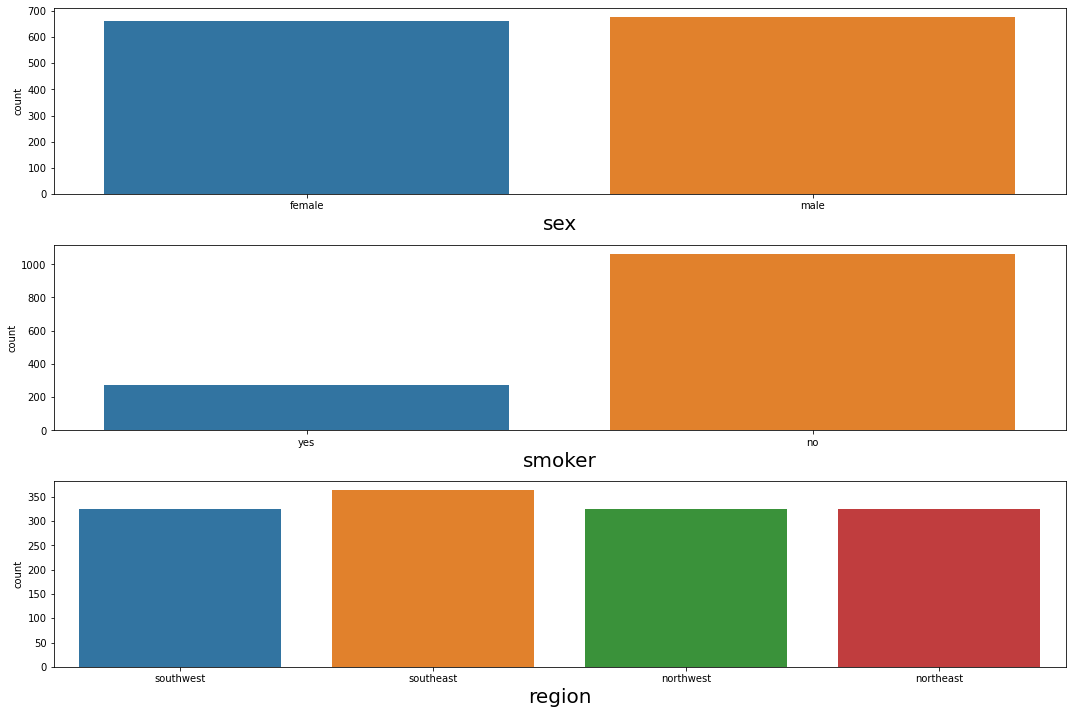

In [18]:
#Lets see how the data is distributed for every column as a whole

plt.figure(figsize =(15,10), facecolor = 'white')
plotnumber = 1

for column in df_visualization_nominal:
    if plotnumber <=3: # as there are 17 columns in data
        ax = plt.subplot(3,1,plotnumber)
        sns.countplot(df_visualization_nominal[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber +=1
plt.tight_layout()

In [19]:
#Lets see the representation individually now with each column

male      676
female    662
Name: sex, dtype: int64


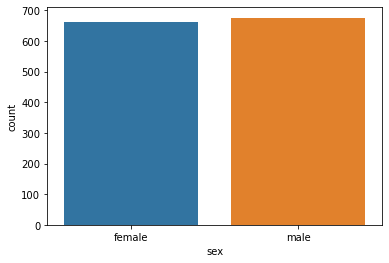

In [20]:

ax = sns.countplot(x='sex',data = df_visualization_nominal)
print(df_visualization_nominal['sex'].value_counts())

From the above observations we can see the total number of male is 676 and the number of females are 662

no     1064
yes     274
Name: smoker, dtype: int64


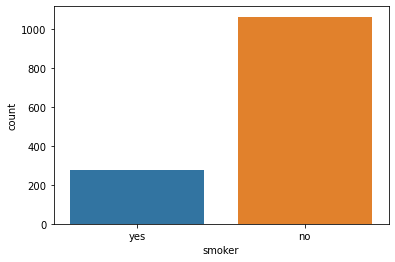

In [21]:
ax = sns.countplot(x='smoker',data = df_visualization_nominal)
print(df_visualization_nominal['smoker'].value_counts())

From the above observations we can see the total number of smoker is 274 and the number of non-smoker is 1064 which is highly one-sided

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


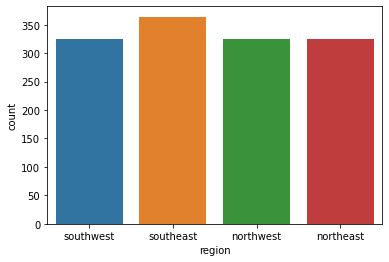

In [22]:
ax = sns.countplot(x='region',data = df_visualization_nominal)
print(df_visualization_nominal['region'].value_counts())

From the above observations we can see the total number of
-southeast    364
-southwest    325
-northwest    325
-northeast    324

# Checking the distribution of the continuous value of the float and int columns.

In [23]:
df_visualization_continuous=df[['age','bmi','children','charges']].copy()

## Lets graph the continuos and nominal data with distplot 

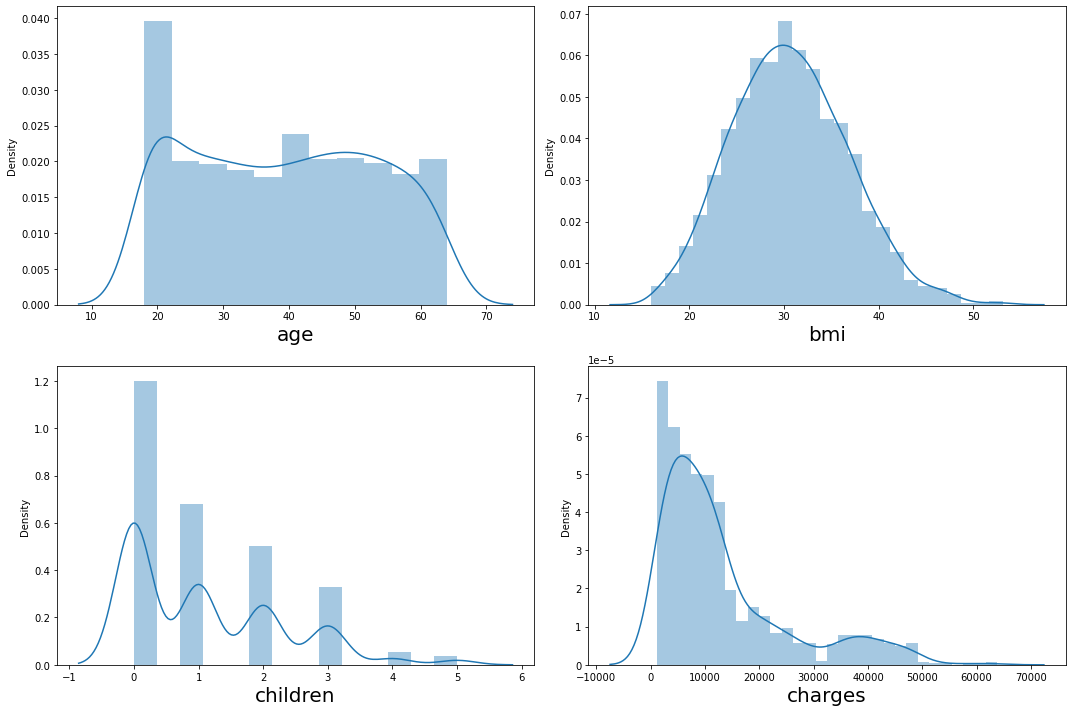

In [24]:
#Lets see how the data is distributed for every column

plt.figure(figsize =(15,10), facecolor = 'white')
plotnumber = 1

for column in df_visualization_continuous:
    if plotnumber <=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df_visualization_continuous[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber +=1
plt.tight_layout()

<AxesSubplot:xlabel='age', ylabel='Density'>

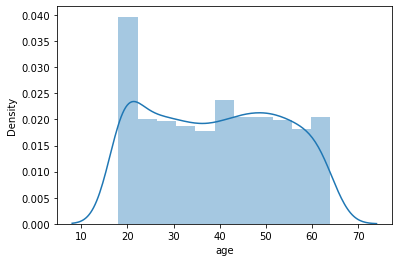

In [25]:
sns.distplot(df_visualization_continuous['age'],kde=True)

We can see that the majority of the age group in in 20 and then 40-50 and we alos see the max age is 60-65

<AxesSubplot:xlabel='bmi', ylabel='Density'>

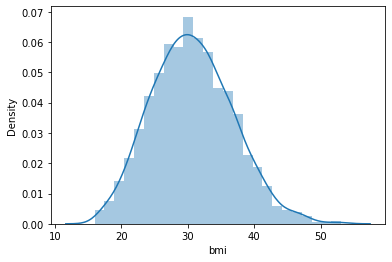

In [26]:
sns.distplot(df_visualization_continuous['bmi'],kde=True)

We can see that the BMI is evenly distributed.

we see the BMI starts from 20 and the ends at 55-60 , so there may be a few outliers but as per the graph there is uniformity

<AxesSubplot:xlabel='children', ylabel='Density'>

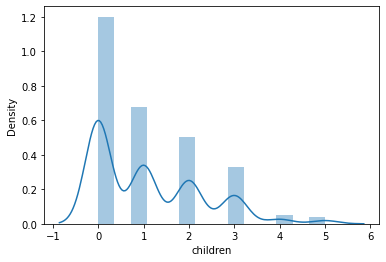

In [27]:
sns.distplot(df_visualization_continuous['children'],kde=True)

We see that most of them have 0 children and then 1 is 2nd highest and the max they have is 5 . As we have most of the people in age 20-25 , the no . of children is 0.

<AxesSubplot:xlabel='charges', ylabel='Density'>

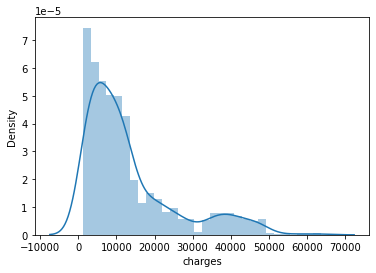

In [28]:
sns.distplot(df_visualization_continuous['charges'],kde=True)

We can see that the most of the charges lies in range 0 to 5000 and the second highest chunk lies between 5000 to 10000

## Since the dataset has a lot of string values. We will use encoding techniques to convert the string data to numerical data 

### Encoding the dataframe with Ordinal Encoder as the values we have are 2 for sex 2 for smoker and 4 for region

In [29]:
from sklearn.preprocessing import OrdinalEncoder

In [30]:
enc=OrdinalEncoder()

In [31]:
for i in df.columns:
    if df[i].dtypes =="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [32]:
df.head() # we see the values have been converted to numerical data which the machne understands

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


In [33]:
df['region'].unique() 

array([3., 2., 1., 0.])

Checking the 4 types of regions in region and see that it have been converted from southeast-southwest -northwest -northeast

# EDA

### Describing the Dataset

In [34]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


We notice all values are accounted for

the mean and std of each coloumn are fairly good

we have no outlier in most cases and no data reduntantcy, so moving to visualizing the data with heatmap to check for relationship of features

# Visualization of the Data


<AxesSubplot:>

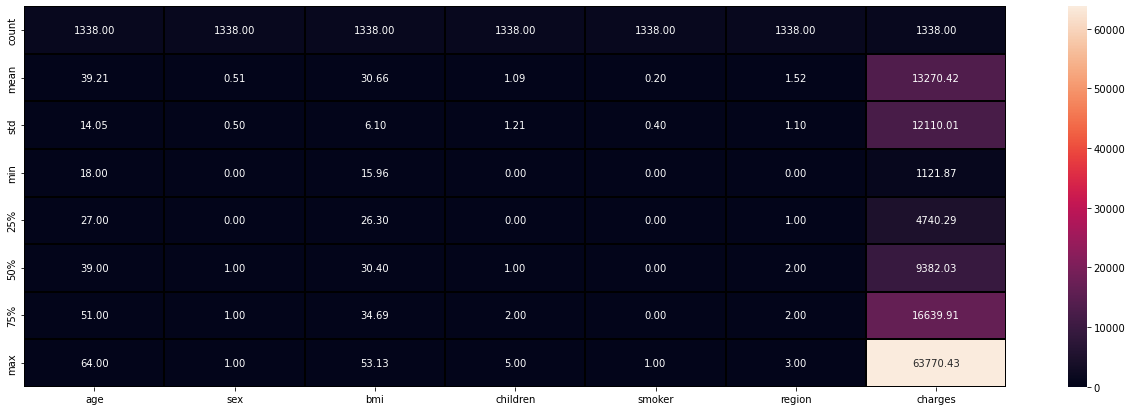

In [35]:
#Lets see how the data is distributed for every column

import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt='0.2f')

We see that all the data is not having any high or too low values to make it show that it has skewness and we see Target variable is also having good distribution

# Correlation of the columns with the target Columns

In [36]:
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

## Heatmap of Correlation of the columns within the Columns or Features and Target

<AxesSubplot:>

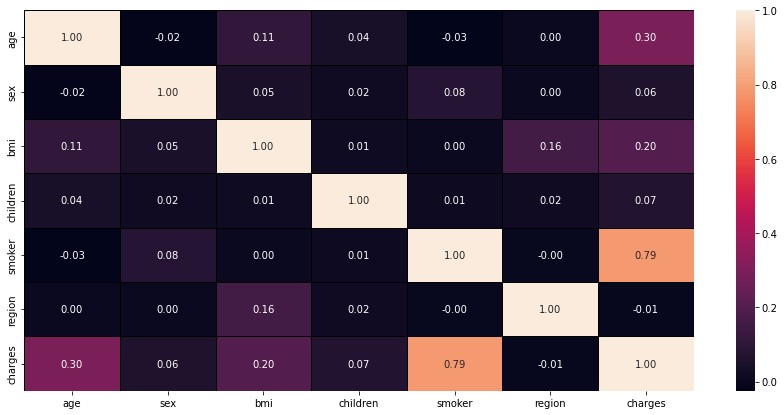

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
#size of canvas
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black', fmt='.2f')

We notice that the smoker columns has the highest relation with target variable 

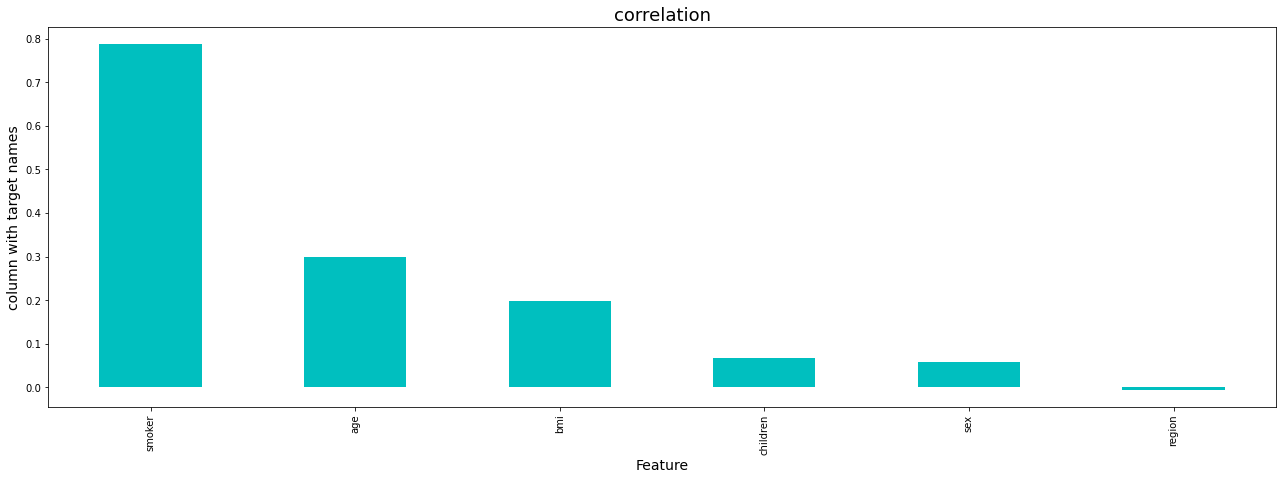

In [38]:
plt.figure(figsize=(22,7))
df.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

As we have seen before from the heat map we see that the smoker feature is the most correlated with the target variable 

### Lets visualize the relationship between our independent vaiables and the categories

In [39]:
#Divide data into features and label

x = df.drop(columns = ['charges'])
y = df['charges']

In [40]:
x #to see x or feature data

,age,sex,bmi,children,smoker,region
0,19,0.0,27.900,0,1.0,3.0
1,18,1.0,33.770,1,0.0,2.0
2,28,1.0,33.000,3,0.0,2.0
3,33,1.0,22.705,0,0.0,1.0
4,32,1.0,28.880,0,0.0,1.0
...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0
1334,18,0.0,31.920,0,0.0,0.0
1335,18,0.0,36.850,0,0.0,2.0
1336,21,0.0,25.800,0,0.0,3.0


In [41]:
y #to see the target or label data

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

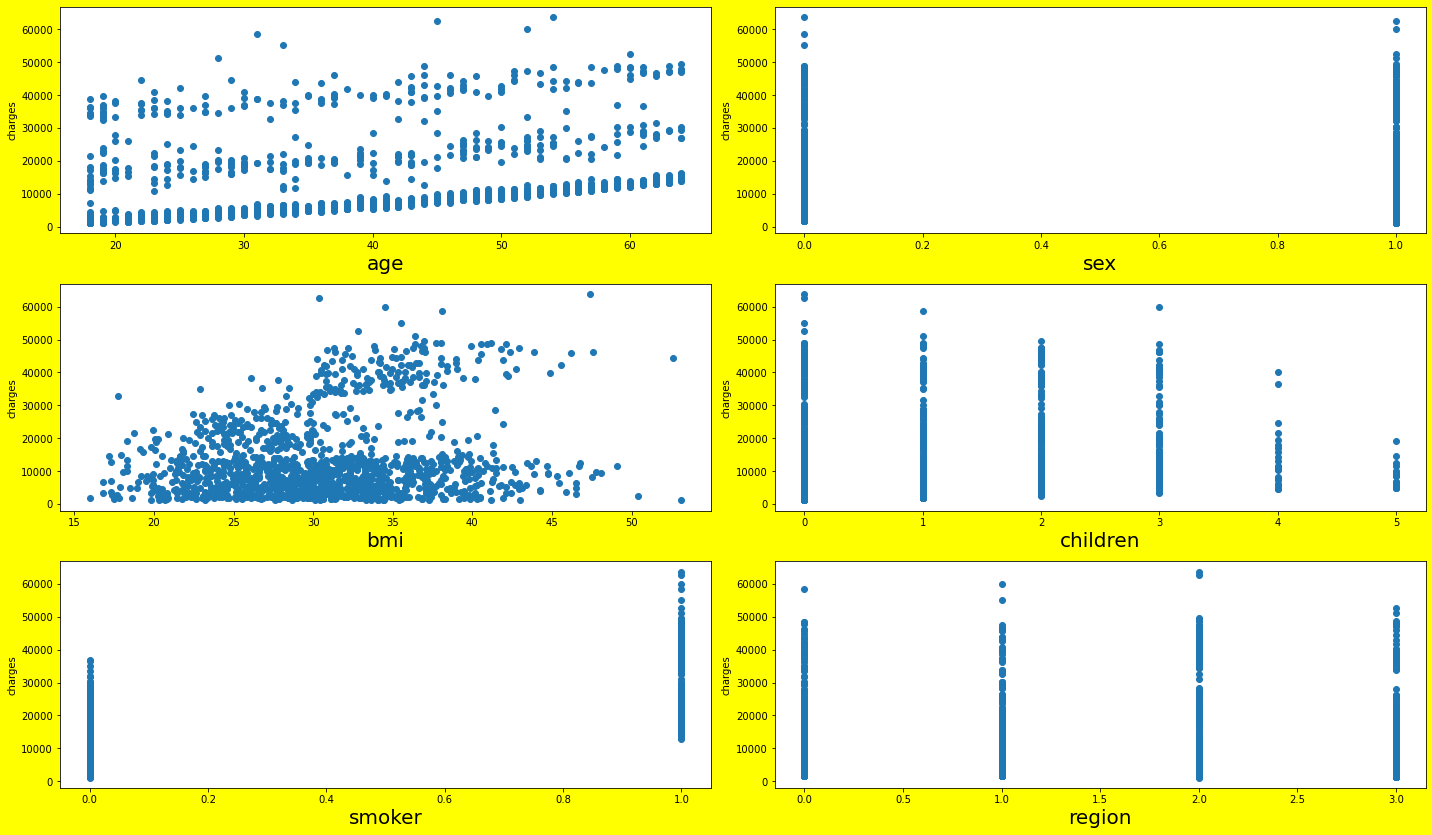

In [42]:
#Lets see how the data is distributed for every column as a whole

#Visualizing Relationship

plt.figure(figsize =(20,15), facecolor = 'yellow')
plotnumber = 1

for column in x:
    if plotnumber <=7:
        ax = plt.subplot(4,2,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('charges',fontsize = 10)
    plotnumber +=1
plt.tight_layout()


From the graph we are not able to ascertain the relationship as the data irregularlt distributed so we will not experience overfitting of any feature

# OUTliers Check

In [43]:
# we need to check for skewness of data
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

Keeping +/0.5 as the range for skewness, here are the columns which do not lie within that range

children - categorical

smoker - categorical

charges - Target Variable

Since , no columns has any skewness we will not treat that as we dont treat categorical or target variable 


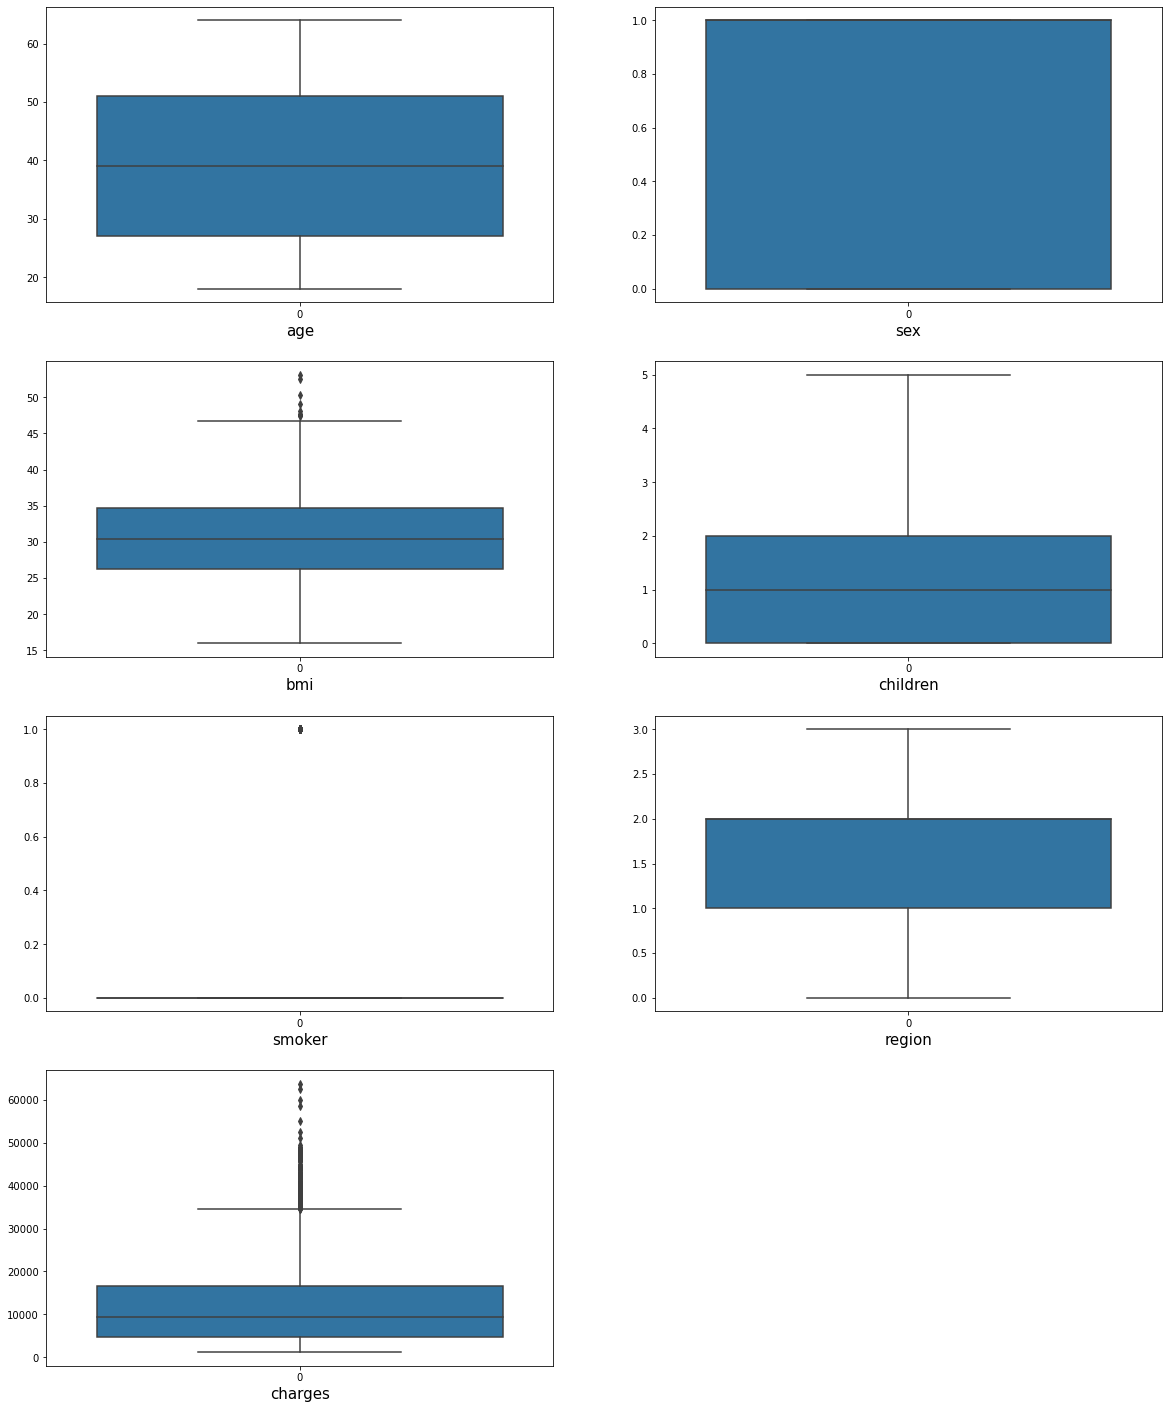

In [44]:
#Lets visualize the data
plt.figure(figsize =(20,25))
graph = 1

for column in df:
    if graph <=7: # as there are 9 columns in data
        plt.subplot(4,2,graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize = 15)
        
    graph +=1
plt.show()

Bmi - continuos

smoker - categorical

charges - Target Variable

Therefore we do not treat the outliers for categorical data as well as the target variable 

<AxesSubplot:>

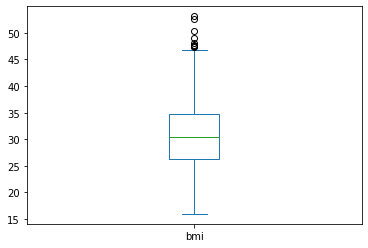

In [45]:
#As we are able to see clearly BMI has ouliers we zoom , checking individualy

df['bmi'].plot.box()

So we treat the bmi using the zscore so that we get a better score overall 

# Considering the outlier removal with Zscore 

In [46]:
df.shape

(1338, 7)

In [47]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
         640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
        1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64),
 array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
        3, 6, 6, 3, 3, 6, 2], dtype=int64))

In [48]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


We see that the values which are greater that zscore 3 have been removed and we end up with 1309 rows which is lesser than orignal

In [49]:
df_new_z.shape

(1309, 7)

In [50]:
##Percentage of data loss:

In [51]:
Data_loss = ((1338-1309)/1338)*100

In [52]:
Data_loss

2.167414050822123

We have see that the data loss is very less almost 3 % so we will take this new data set with less skeweness, now lets plot them to recheck 

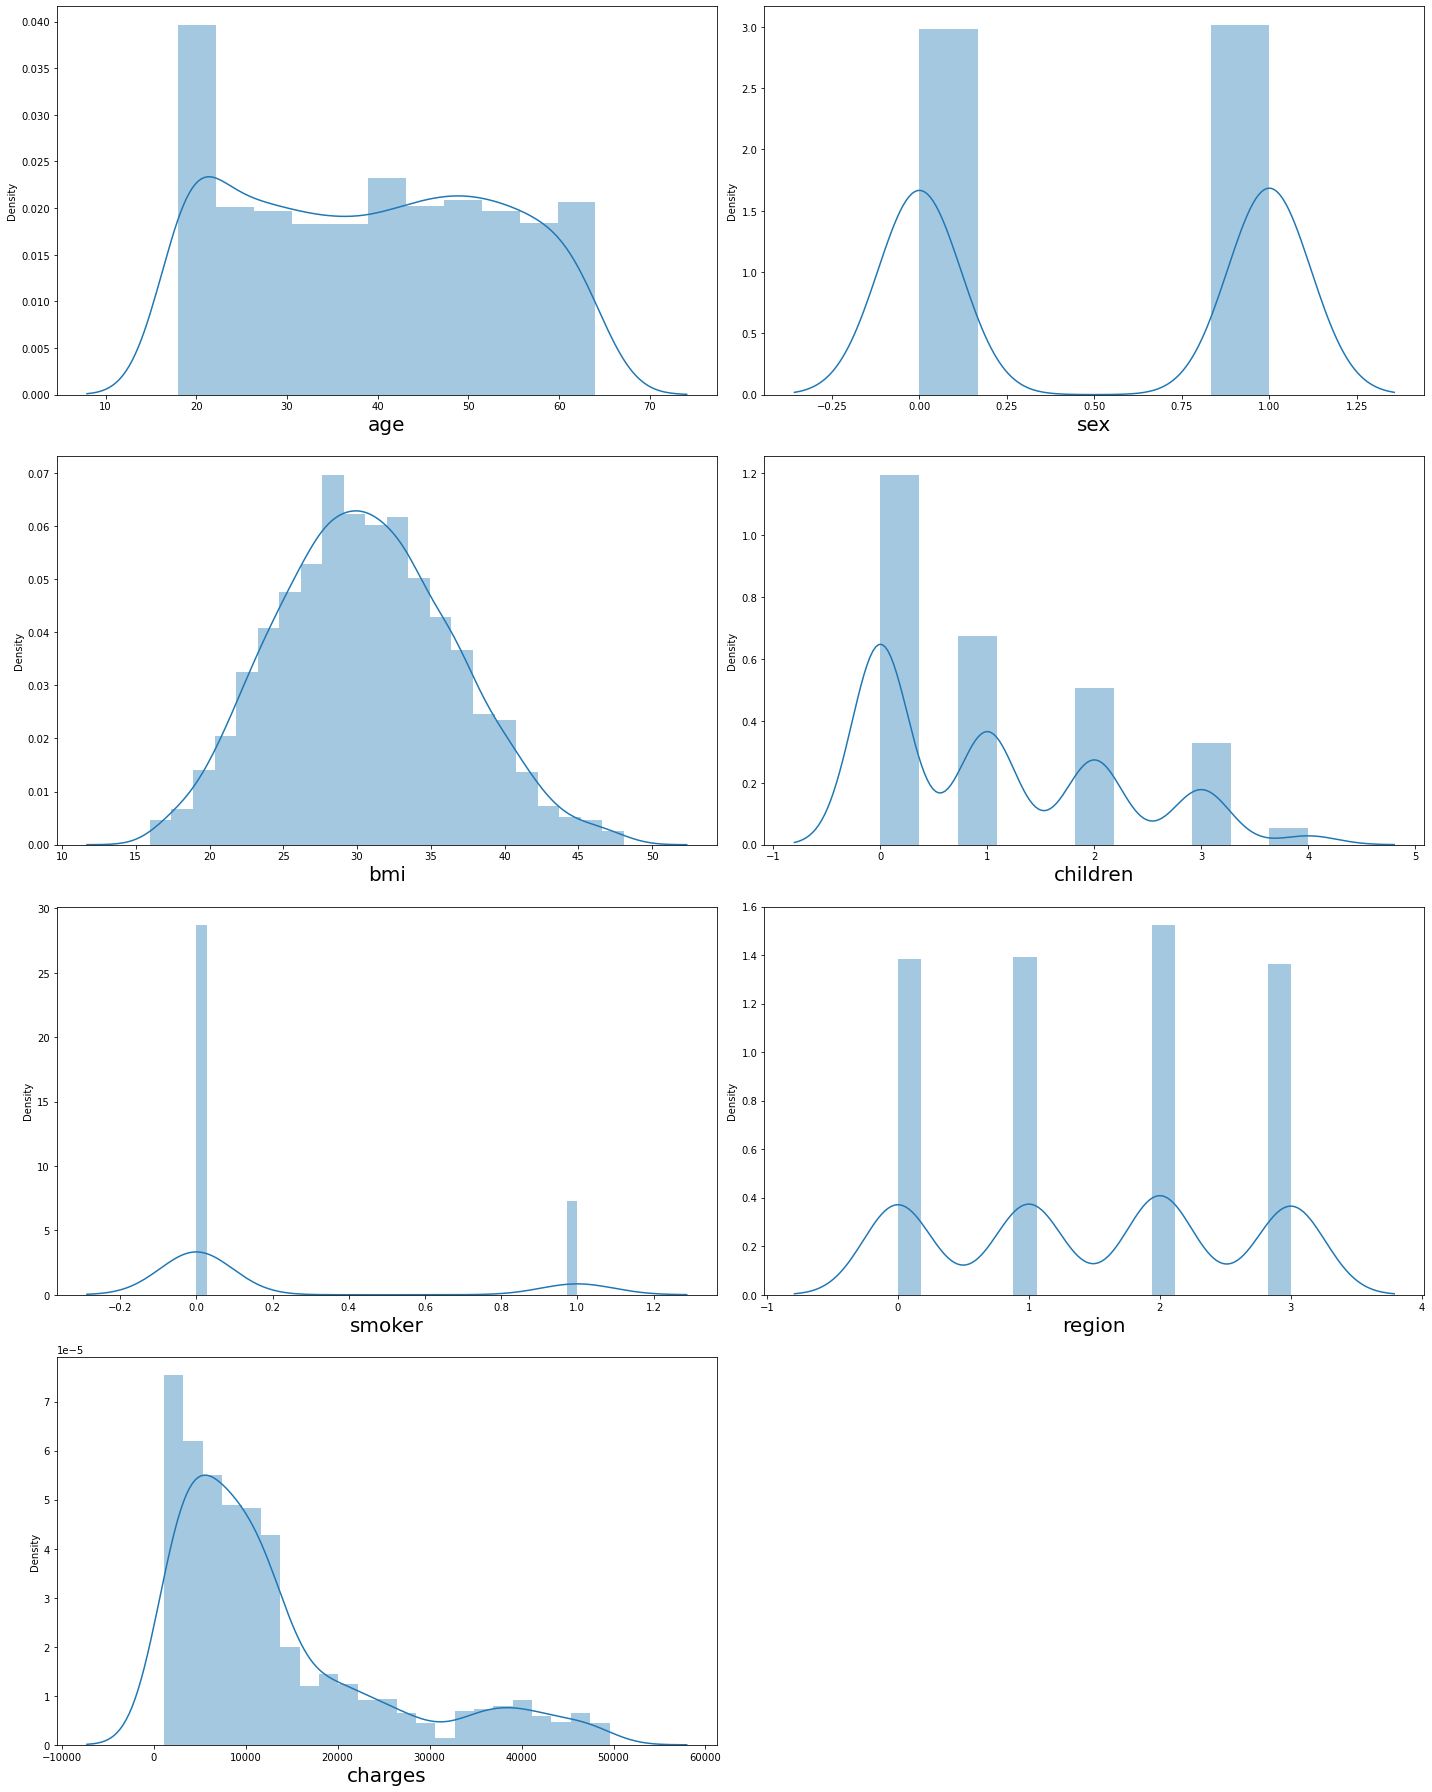

In [53]:
plt.figure(figsize =(20,25), facecolor = 'white')
plotnumber = 1

for column in df_new_z:
    if plotnumber <=7: # as there are 7 columns in data
        ax = plt.subplot(4,2,plotnumber)
        sns.distplot(df_new_z[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber +=1
plt.tight_layout()

<AxesSubplot:xlabel='bmi', ylabel='Density'>

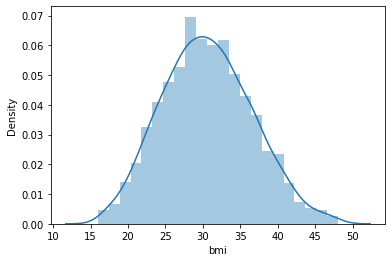

In [54]:
#Checking the continuos data BMI to see the skewness

sns.distplot(df_new_z['bmi'],kde=True)

In [55]:
#lets check the skew one last time

df_new_z.skew()

age         0.051340
sex        -0.010708
bmi         0.191432
children    0.738119
smoker      1.482731
region     -0.023027
charges     1.437160
dtype: float64

From the Graph as well as the value we have reduce skewness from 0.28 for BMI to 0.19 which is very good , so lets us move to the next part

# Using SelectKBest Feature Selection Method

Select KBest use f_classif function to find the best features, where f_classif uses Anova Test

In [56]:
#Divide data into features and label

x = df_new_z.drop(columns = ['charges'])
y = df_new_z['charges']

In [57]:
from sklearn.feature_selection import SelectKBest, f_classif

In [58]:
best_features = SelectKBest(score_func = f_classif, k=6)

fit = best_features.fit(x,y)

df_scores = pd.DataFrame(fit.scores_)

df_columns = pd.DataFrame(x.columns)


#concatenate dataframes

feature_scores = pd.concat([df_columns, df_scores], axis = 1)

feature_scores.columns = ['Feature_name', 'Score']   #name output columns

print(feature_scores.nlargest(6,'Score'))  #Print Best 6 features

  Feature_name  Score
0          age    inf
1          sex    inf
2          bmi    inf
3     children    inf
4       smoker    inf
5       region    inf


We see that K best is not the best method of selection as it is not displaying the scores

# Variance Inflation Factor

Checking for Multicollinearity problem to see if one feature is dependent on the other , we need to scale the dat first using MINMAX Scalar

In [59]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [60]:
X_scaled = mms.fit_transform(x)

In [61]:
X_scaled.shape

(1309, 6)

In [62]:
#Finding variance inflation factor in each scaled column i.e X_scaled.shape[1] (1/(1 -R2))

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif["Features"] = x.columns

#chck Values
vif

,vif,Features
0,2.888630,age
1,1.886301,sex
2,4.607990,bmi
3,1.775028,children
4,1.239980,smoker
5,2.665177,region


All the vif values are less than 5 and that is very low, That means no multicollinearity Now we can go ahead with Prinicipal component analysis as the final feature selection method we are going to use to analyze the relationship between features and target

# Principal Component Analysis (PCA)

It is a dimension reduction technique and not a feature selection one.

and we are going to apply on the features only , it is mainly used if there are too many features and no correlation with the target

but its the final analysis we are going to do to chcek for multicollinearity problem

In [64]:
from sklearn.decomposition import PCA

In [65]:
pca = PCA()

In [66]:
pca.fit_transform(X_scaled) #To scale the data with PCA so we can plot the graph to see whats the coverage 

array([[-0.35073216,  0.86652133,  0.50876458, -0.49802671, -0.14301377,
        -0.07029916],
       [ 0.46692622, -0.27125993,  0.15034567, -0.43901031,  0.13270193,
         0.12055479],
       [ 0.46893871, -0.26436005,  0.15335353, -0.08463588,  0.54361407,
         0.06273359],
       ...,
       [-0.51948416, -0.1079081 ,  0.17328553, -0.51253342, -0.09497716,
         0.23989376],
       [-0.52494133, -0.11726571,  0.46886798, -0.4988161 , -0.10795816,
        -0.14213578],
       [-0.37286782,  0.84703516, -0.12838127,  0.39277059, -0.4241047 ,
        -0.06229654]])

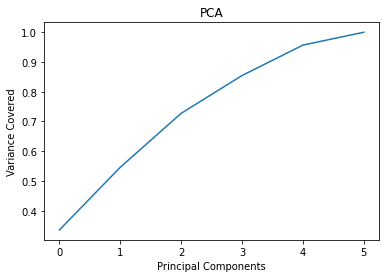

In [67]:
# lets plot scree plot to check the best components

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel("Variance Covered")
plt.title('PCA')
plt.show()

We see that with 4 features we cover 90% of data and with 5 features we cover almost 95% -100% of data so we can use this when there are a lot of features to reducing them , In this case we will not as there are only 6 features

# Creating the Model - Choosing the Best Model

# Linear Regression Model

In [68]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [69]:
import warnings
warnings.filterwarnings('ignore')

In [75]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state = i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At random state {i},the training accuracy is :-{r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is :-{r2_score(y_test,pred_test)}")
    print('\n')

At random state 0,the training accuracy is :-0.7430310329056761
At random state 0,the testing accuracy is :-0.777589021317566


At random state 1,the training accuracy is :-0.7589620977525084
At random state 1,the testing accuracy is :-0.731994171108963


At random state 2,the training accuracy is :-0.7602012219073175
At random state 2,the testing accuracy is :-0.7305358358361113


At random state 3,the training accuracy is :-0.7528793981946968
At random state 3,the testing accuracy is :-0.7526728566939309


At random state 4,the training accuracy is :-0.7526972078025196
At random state 4,the testing accuracy is :-0.7509815052887377


At random state 5,the training accuracy is :-0.7579926559548253
At random state 5,the testing accuracy is :-0.7341818835607289


At random state 6,the training accuracy is :-0.7532165703955274
At random state 6,the testing accuracy is :-0.7495737882641673


At random state 7,the training accuracy is :-0.7524919990938403
At random state 7,the testing accur

We observed that among all the scores we see the ones which are better for our model is where the difference between the training and testing score is the least

so we are choosing random state 15 where traing accuracy is 75.32% and testing is 75% accuracy.

We also notice that for the most of the scores the testing is more accurate that training which should not be the case as training is always higher score that testing , So we will do cross validation and explore more models as well

### Choosing the state we want to create the model

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=15)

In [71]:
lr.fit(x_train,y_train)

LinearRegression()

In [73]:
pred_train = lr.predict(x_train) # Training the model 

In [76]:
print(r2_score(y_test,pred_test)) #Checking the R2 score again with the test features and target

0.7226601769273935


So we see a difference between the accuracy and the r2 score is there but not very significant 75% and 72% , Lets move on to Cross validation

# Cross-Validation of the model

In [80]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy}and the accuracy for testing is {Test_accuracy}")
    print('\n')

At cross fold2 the cv score is 0.7507263874653844 and accuracy score for training is 0.762416261096364and the accuracy for testing is 0.7226601769273935


At cross fold3 the cv score is 0.7482863513140566 and accuracy score for training is 0.762416261096364and the accuracy for testing is 0.7226601769273935


At cross fold4 the cv score is 0.7464940705596477 and accuracy score for training is 0.762416261096364and the accuracy for testing is 0.7226601769273935


At cross fold5 the cv score is 0.7507037701961409 and accuracy score for training is 0.762416261096364and the accuracy for testing is 0.7226601769273935


At cross fold6 the cv score is 0.7479467120567999 and accuracy score for training is 0.762416261096364and the accuracy for testing is 0.7226601769273935


At cross fold7 the cv score is 0.7476013200228121 and accuracy score for training is 0.762416261096364and the accuracy for testing is 0.7226601769273935


At cross fold8 the cv score is 0.7450165785585103 and accuracy score f

We obsserve that the values for training is 76 % and for testing its 72% and we have accuracy score 75% and r2 score which is again 72% , 

So we can conclude that the model is not overfitted and also that among the scores cv=5 is the best

Now that we have handled the problem of overfitting and underfitting we shall move on 

# Plotting the linear Regression graph with actual and predicted values comparison

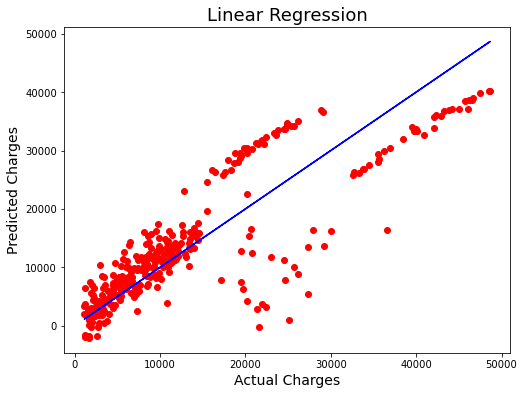

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('Predicted Charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.savefig('lr1.png')
plt.show()

We see that for the initial stage from 0 to 10000 the model is really good with the predictions but as the model moves towards 20000 or 25000 on wards the there is some deviation . Therefore we cannot consider the Linear Regression to be the best model so we will use other algorithms for this project to select the best

# Regularization

In [83]:
from sklearn.model_selection import GridSearchCV #to select the pest parameters for hyperparameter tuning
from sklearn.model_selection import cross_val_score #to check the difference from the earlier score without hyper parameter tuning

In [84]:
from sklearn.linear_model import Lasso

parameters ={'alpha' : [.0001, .001, .01, .1, 1, 10],
            'random_state' : list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


# Final model training for Linear Regression

In [85]:
ls = Lasso(alpha= 10, random_state= 0)
ls.fit(x_train,y_train)
ls_score_training = ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)
ls_score_training*100

76.23635157820446

We are getting a good lasso score of 76.23% which is very similar to the cross val score for training we got earlier.

### Now let us use different model to check which is the best one 

# Decision Tree Regressor

In [87]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision =dt.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score :',rfs*100)

dfscore = cross_val_score(dt,x,y,cv=5)
dfc =dfscore.mean()
print('Cross Val Score :',dfc*100)


R2 Score : 71.20150698355796
Cross Val Score : 68.83460309616271


We observe that for Decision tree regressor 
- there is vast difference between the r2 score  71% and cross val score  68% 
- we see that the score is lesser than Linear regression model of 76%


# Random Forest Regressor

In [90]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()

rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision =rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score :',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc =rfscore.mean()
print('Cross Val Score :',rfc*100)


R2 Score : 83.67052779283203
Cross Val Score : 83.51827964222528


We observe that the Random forest Regressor has actually given us a better accuracy score as well as a better cross val score to compare with
- we see that the r2 score is 83% which is much higher that linear and decision tree model 76% and 71%
- we see there is very very less difference between the r2 score and cross val score so the model is well fit
- no overfitting and underfitting as well 
- the model works better for this kind of data

# XGboost

In [91]:
import xgboost as xgb
xgb = xgb.XGBRegressor()

xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)
pred_decision =xgb.predict(x_test)

xgbs = r2_score(y_test,pred_decision)
print('R2 Score :',xgbs*100)

xgbscore = cross_val_score(xgb,x,y,cv=5)
xgbc =xgbscore.mean()
print('Cross Val Score :',xgbc*100)


R2 Score : 81.08905604503535
Cross Val Score : 80.53615601426293


We observe that the Xgboost Regressor has actually given us a accuracy score of 81% approx
- we see that the r2 score is 81% which is much higher that linear and decision tree model 76% and 71% but lower than random forest which is 83%
- we see there is more difference between the r2 score and cross val score compared to Random forest 0.5% almost
- very less  overfitting and underfitting as well but not as better than Random forest
- the model is the 2nd best in working best for this kind of data

# SVR

In [92]:
from sklearn.svm import SVR
svr = SVR()

svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_decision =svr.predict(x_test)

svrs = r2_score(y_test,pred_decision)
print('R2 Score :',svrs*100)

svrscore = cross_val_score(svr,x,y,cv=5)
svrc =svrscore.mean()
print('Cross Val Score :',svrc*100)


R2 Score : -7.703338179509411
Cross Val Score : -10.110944424126226


We see that SVR is really not a good model for this data set as the values it is giving is inaccurate and highly not usable as we are getting negative 7% and -10% on cross val and R2 score we will not consider this model

## So in conclusion we can choose Random Forest  Regressoras the BEST MODEL for the dataset 

# Hyper parameter Tuning

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#Creating parameters to pass in GridSearchCV

parameters = {'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2'],
             'max_features': [2, 3, 4 ,5],
             'min_samples_leaf': [3, 4, 5, 6, 7],
             'n_estimators' : [100,200,300,400,500]
             }
rf=RandomForestRegressor()
clf= GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 5, 'min_samples_leaf': 6, 'n_estimators': 100}


In [100]:
rf=RandomForestRegressor(criterion='mse',max_features=5,min_samples_leaf=6,n_estimators=100)

rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision =rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score :',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc =rfscore.mean()
print('Cross Val Score :',rfc*100)


R2 Score : 85.81588186472953
Cross Val Score : 85.90648025916978


### We see that we have increased the score from 83% approx to 85% now which is a good sign and this model is the best for this project

In [102]:
import pickle
filename = 'Insurance.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [108]:
loaded_model = pickle.load(open('Insurance.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

85.81588186472953


In [109]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Orignal'])

In [110]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,318,319,320,321,322,323,324,325,326,327
Predicted,13760.615115,7825.734442,9015.762339,14577.279556,11715.882918,16307.395144,6719.794045,13818.641215,2400.190375,42802.736073,...,8760.694278,11529.093816,13343.510385,11106.799112,8337.55465,43750.82038,5443.786234,5868.590437,13026.62221,24096.040039
Orignal,13760.615115,7825.734442,9015.762339,14577.279556,11715.882918,16307.395144,6719.794045,13818.641215,2400.190375,42802.736073,...,8760.694278,11529.093816,13343.510385,11106.799112,8337.55465,43750.82038,5443.786234,5868.590437,13026.62221,24096.040039


### We see that the model has predicted the charges on 328 columns againest the actual charges , so the Random Forest is the best one 